In [2]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
import csv
import seaborn as sns

csv_2022="tmdb/tmdb_movie_2022.csv"
csv_2021="tmdb/tmdb_movie_2021.csv"
csv_2020="tmdb/tmdb_movie_2020.csv"
csv_2019="tmdb/tmdb_movie_2019.csv"
csv_2018="tmdb/tmdb_movie_2018.csv"
csv_2017="tmbd/tmdb_movie_2017.csv"
tmdb_sample_df="tmdb_movie_sample.csv"

In [3]:
tmdb_df = pd.read_csv('../project-1/tmdb_movie_sampleset.csv')


In [4]:
tmdb_new_df = tmdb_df.rename(columns={"Country":"Language"})
tmdb_new_df.head(5)                         

,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,budget,revenue,Language,Genre
0,0,False,NaN,10749.0,485470,ko,ì°©í•œ í˜•ìˆ˜2,"If you give it once, a good brother-in-law who...",1515.469,/3pEs4hmeHvTAsmx09whEaPDOQpq.jpg,43016,Nice Sister-In-Law 2,False,6.0,2,50000.00000,2.000000e+06,Korean,Romance
1,1,False,/7OxGhxUYAdtuike29VMzEFxJx7y.jpg,35.0,2907,en,The Addams Family,When a man claiming to be long-lost Uncle Fest...,413.417,/qFf8anju5f2epI0my8RdwwIXFIP.jpg,33564,The Addams Family,False,7.0,3804,62719.55498,2.091316e+04,English,Comedy
2,2,False,/naNXYdBzTEb1KwOdi1RbBkM9Zv1.jpg,27.0,420634,en,Terrifier,"On Halloween night, a young woman finds hersel...",295.279,/4lwh4MX2yCogHflyAYMRbfdnpnm.jpg,42444,Terrifier,False,6.6,1117,59889.54934,6.096422e+04,English,Horror
3,3,False,/qkt1Qn9j6yw9rcJhvSu1p3wuiBm.jpg,10751.0,8871,en,How the Grinch Stole Christmas,Inside a snowflake exists the magical land of ...,289.345,/1WZbbPApEivA421gCOluuzMMKCk.jpg,36845,How the Grinch Stole Christmas,False,6.7,6190,12247.42076,2.635347e+04,English,Family
4,4,False,/t3LicFpYHeYpwqm7L5wDpd22hL5.jpg,12.0,671,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,223.770,/wuMc08IPKEatf9rnMNXvIDxqP4W.jpg,37211,Harry Potter and the Philosopher's Stone,False,7.9,23632,99721.08690,2.219786e+04,English,Adventure


In [5]:
tmdb_list_df=pd.DataFrame()
year2 = 2017
for year2 in range(2017, 2022):
    yearlist_df = pd.read_csv(f"tmdb/tmdb_movie_{year2}.csv")
    tmdb_list_df = pd.concat([tmdb_list_df, yearlist_df], ignore_index=True)
    year2 += 1   
tmdb_list_df[['original_title','release_date','original_language','overview','vote_count','popularity']]
tmdb_list_df.sort_values("title", inplace=True)
  
# dropping ALL duplicate values
tmdb_list_df.drop_duplicates(subset="title",keep=False, inplace=True) 
tmdb_list_df.head(5)

,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
17471,5791,False,/x0SpF3I46uAG0bhaeciKWYJZZu2.jpg,[99],663860,en,1312,Facts about American police officers,0.600,/65ERfg6jGCf2lzvjE2dH5eMv7xo.jpg,2021-01-01,1312,False,0.0,0
16646,4966,False,/zHOkFpqlj14HqEGe8WL7fhmTrUb.jpg,[99],660945,no,16,The film follows the lives of four queer youth...,0.600,NaN,2021-06-02,16,False,0.0,0
16887,5207,False,/1iltPiY3dH4pKQ8hvJWs82ijViq.jpg,[99],597612,en,17 Blocks,"Using two decades of intimate home video, the ...",2.850,/4Qom9ChexgW8cnf2TUSPjsBJ4EV.jpg,2021-06-09,17 Blocks,False,6.6,5
17427,5747,False,NaN,[],670989,en,1985,Love and hope will never be destroyed. A story...,0.932,/lL54WbGB5puObr5aoZyQHEh6oCh.jpg,2021-12-31,1985,False,0.0,0
17461,5781,False,NaN,"[10749, 18, 35]",669374,en,2 Weeks in Lagos,2 Weeks in Lagos is a turbulent and thrilling ...,1.590,/nXgNM8eWdTIpR9eURKbg1CRUEU2.jpg,2021-02-14,2 Weeks in Lagos,False,2.0,1


In [6]:
tmdb_list_df.columns

Index(['Unnamed: 0', 'adult', 'backdrop_path', 'genre_ids', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'release_date', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
tmdb_list_df.shape

(558, 15)

In [8]:
tmdb_list_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,558.000000,558.000000,558.000000,558.00000,558.000000
mean,5268.001792,627429.308244,11.076380,4.27491,242.306452
std,341.179670,96705.272633,32.592403,3.13680,1068.374181
min,4660.000000,307109.000000,0.600000,0.00000,0.000000
25%,4970.250000,582090.500000,0.646500,0.00000,0.000000
50%,5253.500000,645858.500000,1.740500,5.80000,4.000000
75%,5559.750000,705954.500000,7.065750,6.80000,31.000000
max,5819.000000,764179.000000,552.978000,10.00000,15975.000000


In [9]:
top_5_tmdb = tmdb_new_df.sort_values(['popularity'], ascending=False)[['title','popularity']]
top_5_tmdb.head(10)

,title,popularity
0,Nice Sister-In-Law 2,1515.469
1,The Addams Family,413.417
2,Terrifier,295.279
3,How the Grinch Stole Christmas,289.345
4,Harry Potter and the Philosopher's Stone,223.770
5,Harry Potter and the Chamber of Secrets,203.984
6,Harry Potter and the Half-Blood Prince,203.954
7,Harry Potter and the Goblet of Fire,196.642
8,Harry Potter and the Prisoner of Azkaban,180.313
88,Transformers: The Last Knight,178.400


C:\Users\deepi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


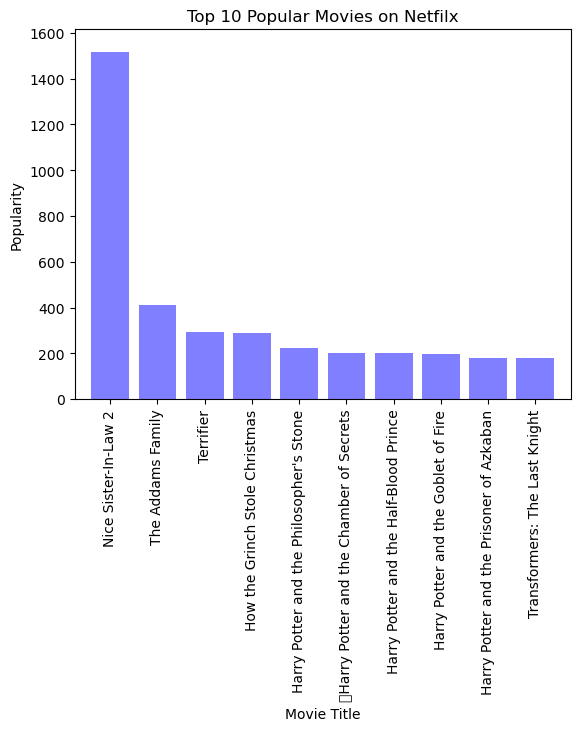

<Figure size 1500x700 with 0 Axes>

In [24]:
users = [1515, 413, 295, 289, 223,203,203,196,180,178]
x_axis = ["Nice Sister-In-Law 2", "The Addams Family", "Terrifier", "How the Grinch Stole Christmas", "Harry Potter and the Philosopher's Stone","	Harry Potter and the Chamber of Secrets","Harry Potter and the Half-Blood Prince","Harry Potter and the Goblet of Fire","Harry Potter and the Prisoner of Azkaban","Transformers: The Last Knight"]
plt.bar(x_axis, users, color = "b", alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nice Sister-In-Law 2", "The Addams Family", "Terrifier", "How the Grinch Stole Christmas", "Harry Potter and the Philosopher's Stone","	Harry Potter and the Chamber of Secrets","Harry Potter and the Half-Blood Prince","Harry Potter and the Goblet of Fire","Harry Potter and the Prisoner of Azkaban","Transformers: The Last Knight"],rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+100)
plt.title("Top 10 Popular Movies on Netfilx")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1,popularmovies.png")
plt.show()

In [11]:
Language_count = tmdb_new_df.Language.value_counts()
Language_count.head(10)

English               662
German                 76
French                 70
Spanish, Castilian     58
Portuguese             38
Japanese               32
Tamil                  24
Korean                 23
Italian                19
Chinese                17
Name: Language, dtype: int64

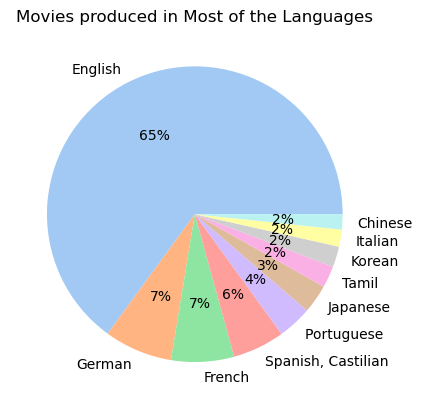

In [20]:
values = [662,76,70,58,38,32,24,23,19,17]
labels = ['English','German','French','Spanish, Castilian','Portuguese ','Japanese','Tamil','Korean','Italian','Chinese']
pie_colors = sns.color_palette('pastel')
plt.pie(values, labels=labels, colors=pie_colors, autopct='%.0f%%', radius=1)
plt.title("Movies produced in Most of the Languages",y=1)
plt.savefig("../project-1,language.png")
plt.show()

In [13]:
top_10_tmdb = tmdb_new_df.sort_values(['popularity'], ascending=False)[['title','popularity','vote_average']]
top_10_tmdb.head(10)

,title,popularity,vote_average
0,Nice Sister-In-Law 2,1515.469,6.0
1,The Addams Family,413.417,7.0
2,Terrifier,295.279,6.6
3,How the Grinch Stole Christmas,289.345,6.7
4,Harry Potter and the Philosopher's Stone,223.770,7.9
5,Harry Potter and the Chamber of Secrets,203.984,7.7
6,Harry Potter and the Half-Blood Prince,203.954,7.7
7,Harry Potter and the Goblet of Fire,196.642,7.8
8,Harry Potter and the Prisoner of Azkaban,180.313,8.0
88,Transformers: The Last Knight,178.400,6.0


C:\Users\deepi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


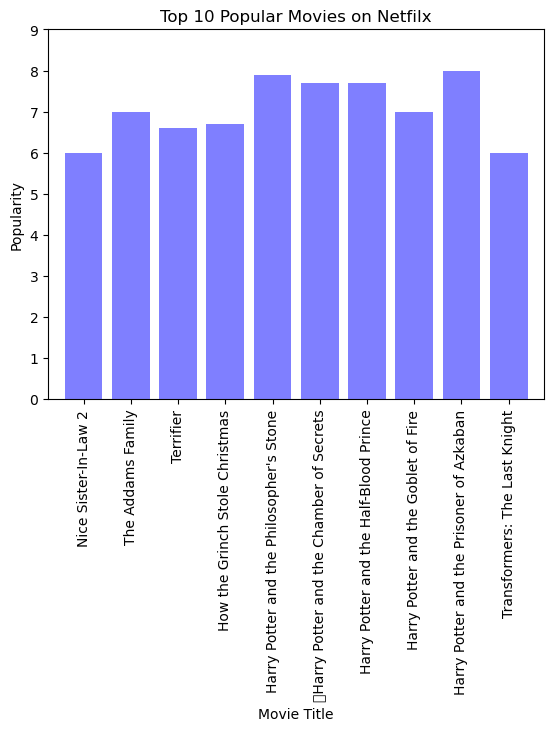

<Figure size 1500x700 with 0 Axes>

In [21]:
users = [6, 7, 6.6, 6.7, 7.9, 7.7,7.7,7,8.0,6]
x_axis = ["Nice Sister-In-Law 2", "The Addams Family", "Terrifier", "How the Grinch Stole Christmas", "Harry Potter and the Philosopher's Stone","	Harry Potter and the Chamber of Secrets","Harry Potter and the Half-Blood Prince","Harry Potter and the Goblet of Fire","Harry Potter and the Prisoner of Azkaban","Transformers: The Last Knight"]
plt.bar(x_axis, users, color = "b", alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nice Sister-In-Law 2", "The Addams Family", "Terrifier", "How the Grinch Stole Christmas", "Harry Potter and the Philosopher's Stone","	Harry Potter and the Chamber of Secrets","Harry Potter and the Half-Blood Prince","Harry Potter and the Goblet of Fire","Harry Potter and the Prisoner of Azkaban","Transformers: The Last Knight"],rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+1)
plt.title("Top 10 Popular Movies on Netfilx")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1,popularmovies.png")

In [15]:
top_10_tmdb = tmdb_new_df.sort_values(['vote_average'], ascending=False)[['title','popularity','vote_average']]
top_10_tmdb.head(10)

,title,popularity,vote_average
470,Dr. Nawariyan,0.600,10.0
703,Caro Lucio ti scrivo,0.920,10.0
1153,Elvis Walks Home,0.600,10.0
1149,Matlatl,0.627,10.0
924,6 on 77: The Dulles Airport 9/11 Cover-Up,0.600,10.0
1139,Videotape,0.877,10.0
112,Toxic Tutu,2.561,10.0
509,"No Money, No Future",0.628,10.0
221,Promise,0.676,10.0
52,Damsel,0.629,10.0


C:\Users\deepi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


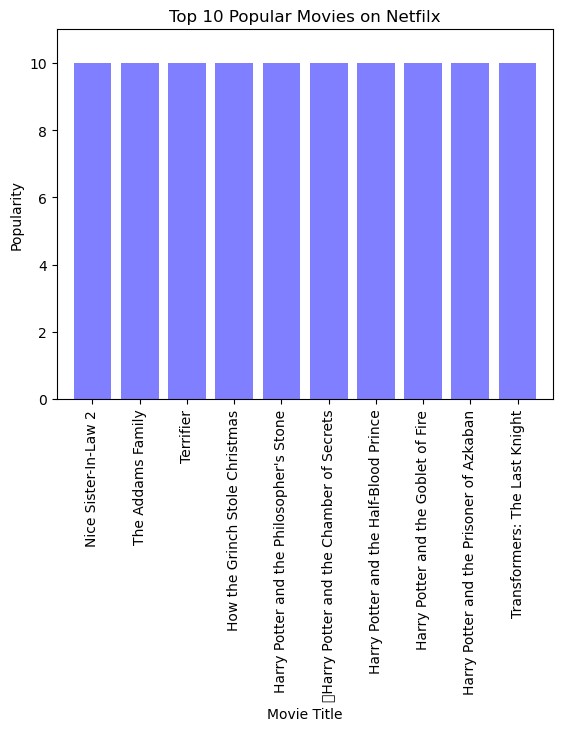

<Figure size 1500x700 with 0 Axes>

In [22]:
users = [10, 10, 10, 10, 10, 10,10,10,10,10]
x_axis = ["Nice Sister-In-Law 2", "The Addams Family", "Terrifier", "How the Grinch Stole Christmas", "Harry Potter and the Philosopher's Stone","	Harry Potter and the Chamber of Secrets","Harry Potter and the Half-Blood Prince","Harry Potter and the Goblet of Fire","Harry Potter and the Prisoner of Azkaban","Transformers: The Last Knight"]
plt.bar(x_axis, users, color = "b", alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nice Sister-In-Law 2", "The Addams Family", "Terrifier", "How the Grinch Stole Christmas", "Harry Potter and the Philosopher's Stone","	Harry Potter and the Chamber of Secrets","Harry Potter and the Half-Blood Prince","Harry Potter and the Goblet of Fire","Harry Potter and the Prisoner of Azkaban","Transformers: The Last Knight"],rotation=90)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(users)+1)
plt.title("Top 10 Popular Movies on Netfilx")
plt.xlabel("Movie Title")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
plt.savefig("../project-1,popularmovies.png")

In [17]:
month_count = tmdb_list_df.sort_values(['release_date'] ,ascending=False)[['release_date']].value_counts()
month_count.head(10)

release_date
2021-12-31      37
2021-09-09      12
2021-01-01      10
2021-06-17       9
2021-02-26       8
2021-09-03       7
2021-03-12       7
2021-10-28       7
2021-04-08       6
2021-02-12       6
dtype: int64

In [18]:
# Create a new variable that holds the sum of our groups
sum_it_up = tmdb_list_df[['vote_count']].sum()
sum_it_up.head(20)

vote_count    135207
dtype: int64